# 

In [51]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import dateutil.parser

In [59]:
df = pd.read_csv("result.csv")
df.head()

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,create_time,life_time_sec,first_event_time_sec,first_comment_time_sec,commit_count,comment_count,end
0,Issue,"""https://github.com/guzzle/guzzle/issues/3221""",User,Member,False,2,0,1,0,1,2024-05-29 14:39:44+00:00,2384,-1,2384,0,1,Green
1,Issue,"""https://github.com/guzzle/guzzle/issues/3217""",User,Member,False,2,0,1,0,1,2024-05-04 10:35:18+00:00,1229,-1,1229,0,1,Green
2,Issue,"""https://github.com/guzzle/guzzle/issues/3216""",User,Member,False,2,0,1,0,1,2024-05-02 19:19:27+00:00,8868,-1,8868,0,2,Green
3,PR,"""https://github.com/guzzle/guzzle/pull/3213""",User,User,True,1,0,0,0,1,2024-03-31 21:33:43+00:00,209,-1,-1,2,0,Green
4,PR,"""https://github.com/guzzle/guzzle/pull/3212""",User,User,True,1,0,0,0,1,2024-03-31 21:32:34+00:00,217,-1,-1,2,0,Green


In [64]:
def set_type(c):
    if c['life_day'] > 60:
        return "xlong"
    elif c['life_day'] > 14:
        return "long"
    elif c['life_day'] > 3:
        return "mid"
    elif c['life_day'] > 1:
        return "short"
    elif c['life_day'] > 0:
        return "xshort"
    else:
        return "zero"

In [61]:
df['create_time'] = df.apply(lambda row: ( dateutil.parser.parse(row.create_time) ), axis=1 )

TypeError: Parser must be a string or character stream, not Timestamp

In [66]:
df['bot_ratio'] = df.apply(lambda row: row.participants_bot / row.participants_total , axis=1 )
df['has_bot'] = df.apply(lambda row: row.participants_bot > 0 , axis=1 )
df['life_day'] = df.apply(lambda row: row.life_time_sec / (60 * 60 * 24 ) , axis=1 )
df['idle_time'] = df.apply(lambda row: ( (row.first_comment_time_sec  + 1 ) / (row.life_time_sec + 1) ) , axis=1 )
df['ymonth'] = df.apply(lambda row: ( row.create_time.strftime("%Y%m") ), axis=1 )
df['life_type'] = df.apply(lambda row: (set_type(row)),axis=1)

In [67]:
dfs = df.sort_values(by=['life_day','idle_time'])
iss = dfs[(dfs["rc_ty"]=="Issue") & (dfs["life_time_sec"] >= 0)]
prs = dfs[(dfs["rc_ty"]=="PR") & (dfs["life_time_sec"] >= 0)]
dfs

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,...,first_comment_time_sec,commit_count,comment_count,end,bot_ratio,has_bot,life_day,idle_time,ymonth,life_type
307463,Issue,"""https://github.com/Leaflet/Leaflet/pull/1118""",Contributer,User,False,2,0,0,1,1,...,16,1,1,Green,0.0,False,-0.000104,-2.125000,201211,zero
132842,Issue,"""https://github.com/fastai/fastbook/issues/443""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,202105,zero
132843,Issue,"""https://github.com/fastai/fastbook/issues/442""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,202105,zero
132844,Issue,"""https://github.com/fastai/fastbook/issues/441""",User,User,True,1,0,0,0,1,...,-1,0,0,Green,0.0,False,0.000000,0.000000,202105,zero
177245,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,2,0,0,0,2,...,-1,0,0,Green,0.0,False,0.000000,0.000000,202310,zero
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319456,Issue,"""https://github.com/scrapy/scrapy/issues/113""",User,Member,False,6,0,3,0,3,...,25313542,0,3,Green,0.0,False,4016.555544,0.072943,201204,xlong
147090,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,5,0,0,0,5,...,166992,0,2,Green,0.0,False,4052.971586,0.000477,201203,xlong
147306,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,6,0,1,0,5,...,17215,0,4,Green,0.0,False,4091.350961,0.000049,201202,xlong
147776,Issue,"""https://github.com/nodejs/node-v0.x-archive/i...",User,User,False,6,0,0,0,6,...,43908980,0,2,Green,0.0,False,4166.230093,0.121982,201111,xlong


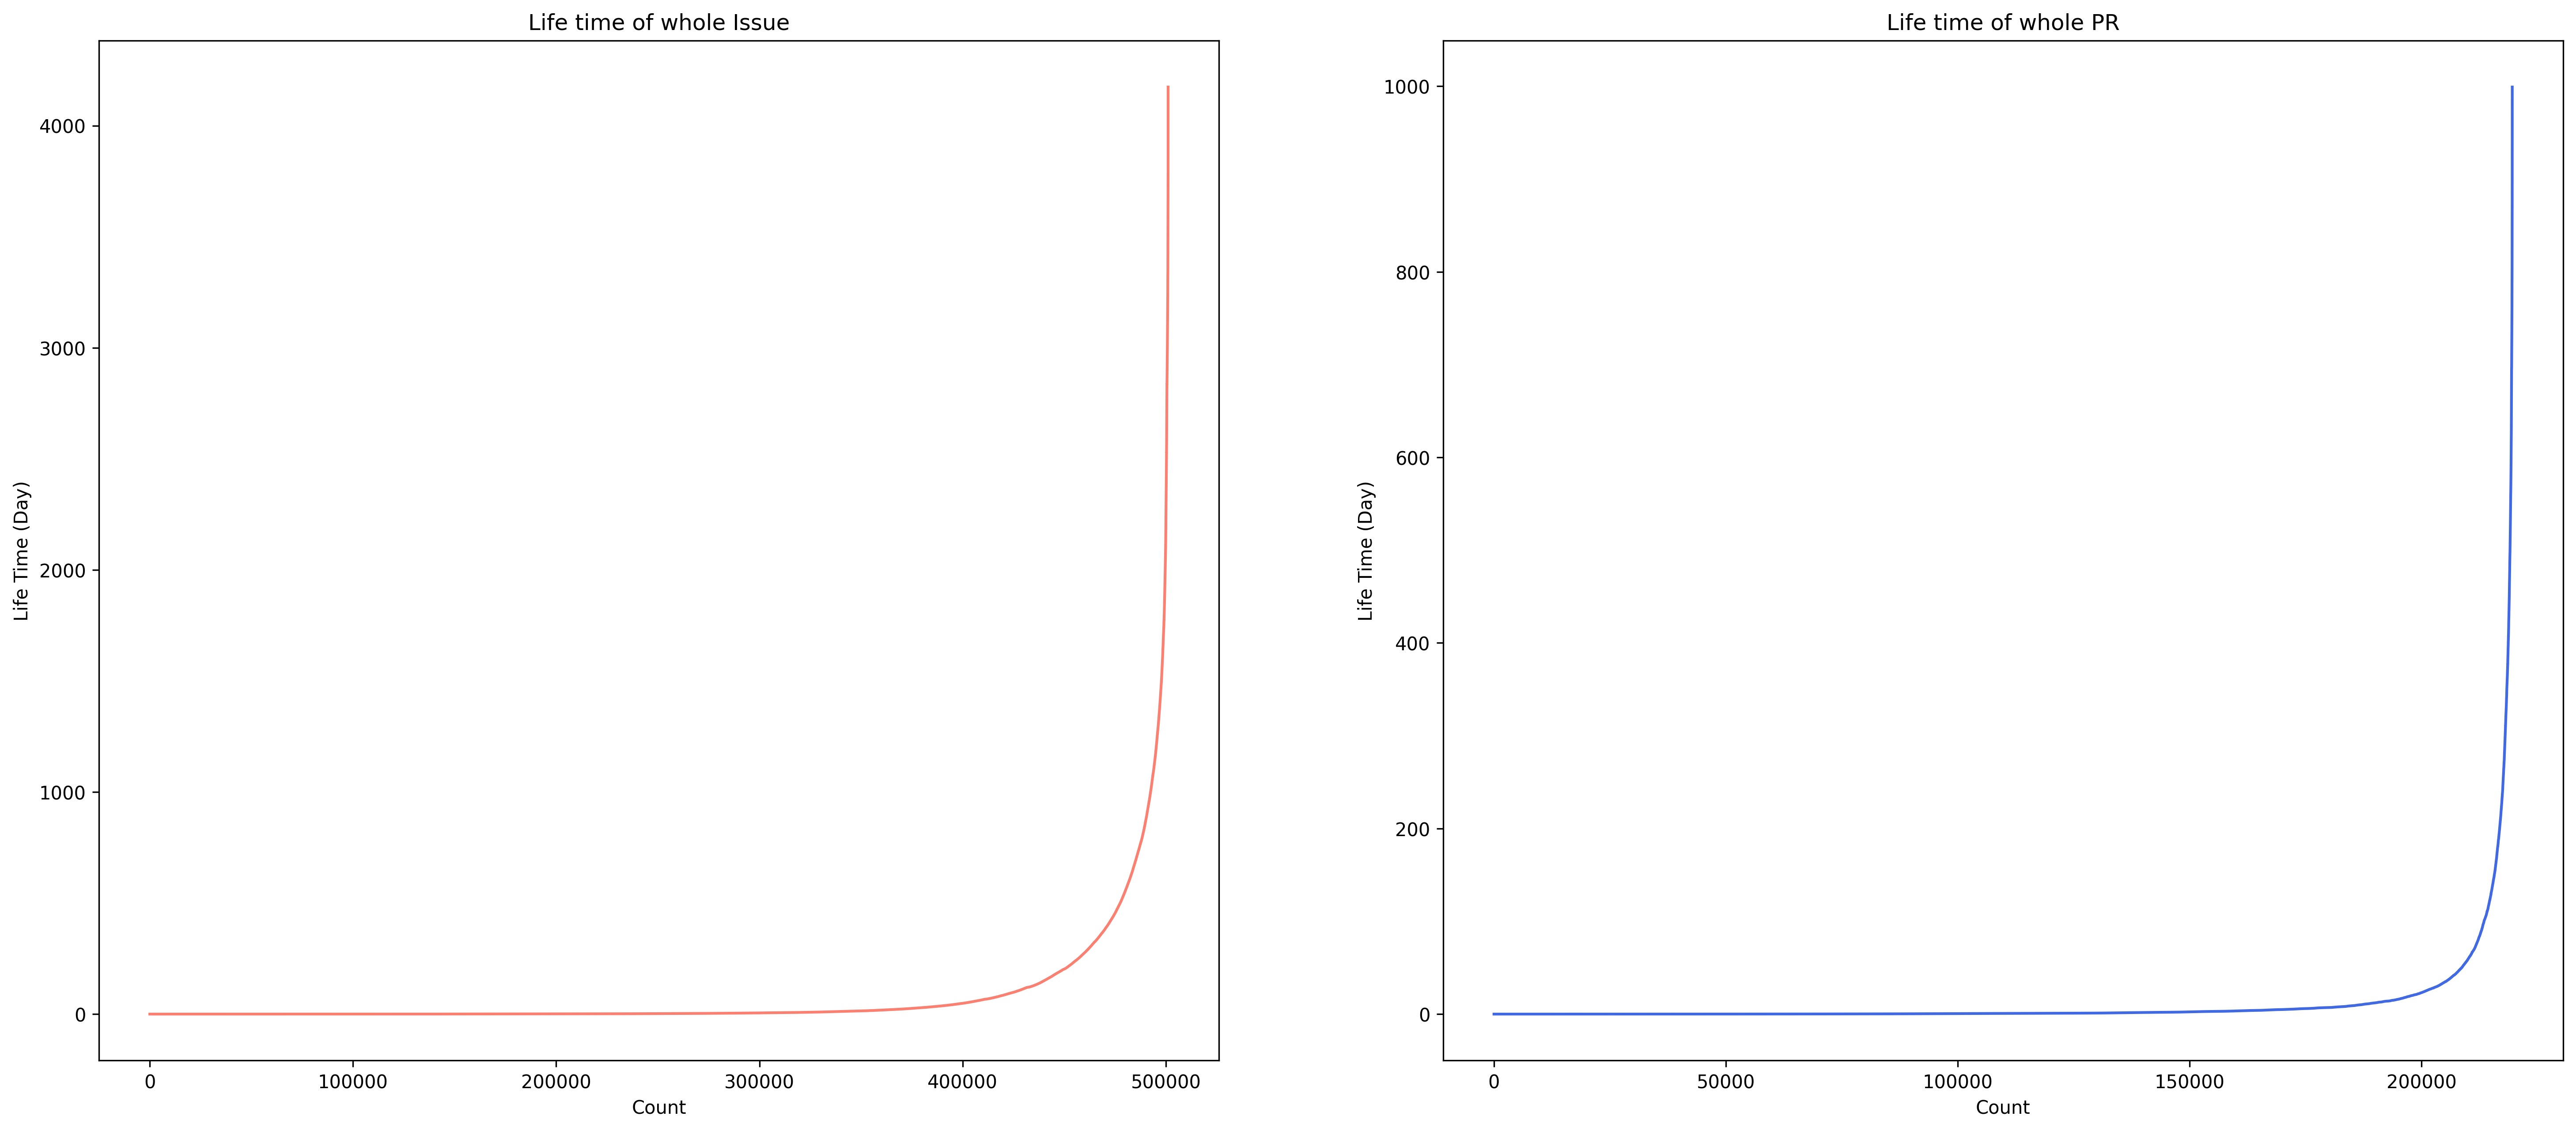

In [5]:
fig = plt.figure(figsize=(24,10),dpi=300)
l1  = fig.add_subplot(1,2,1)
r1  = fig.add_subplot(1,2,2)

def draw_lifetime_whole(df: pd.DataFrame,pl,name:str,color:str):
    xi = list(range(len(df)))
    pl.set_title(f"Life time of whole {name}")
    pl.set_xlabel("Count")
    pl.set_ylabel("Life Time (Day)")
    pl.plot(xi,df['life_day'],color=color)

draw_lifetime_whole(iss,l1,"Issue","salmon")
draw_lifetime_whole(prs,r1,"PR","royalblue")

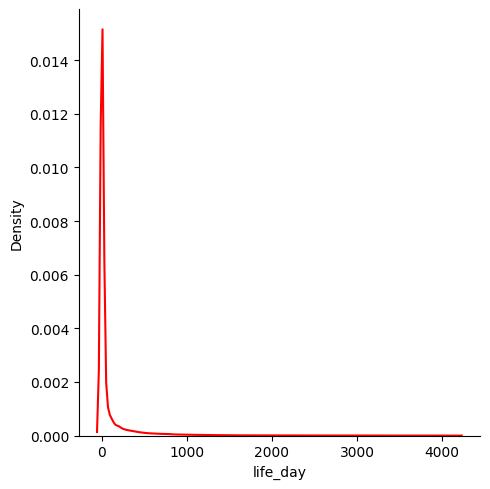

In [6]:
sns.displot(data = iss,kind="kde", x="life_day", color = 'red')

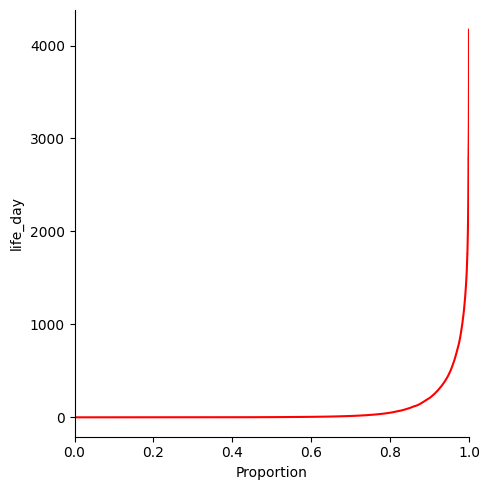

In [7]:
sns.displot(data = iss,kind="ecdf", y="life_day", color = 'red')

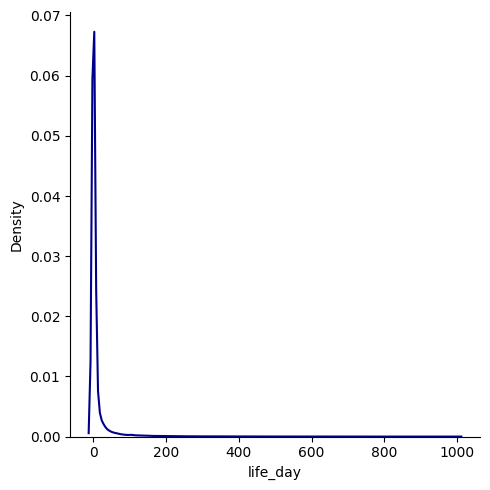

In [8]:
sns.displot(data = prs,kind="kde", x="life_day", color = 'darkblue')

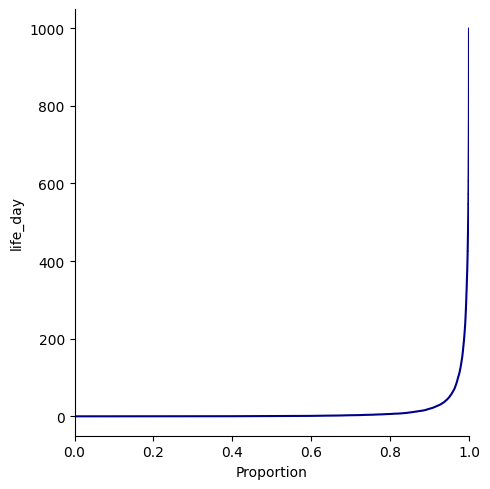

In [9]:
sns.displot(data = prs,kind="ecdf", y="life_day", color = 'darkblue')

In [10]:
len(iss)

501129

In [11]:
iss_mid=iss[(iss["life_day"] < 100)]
len(iss_mid)

425731

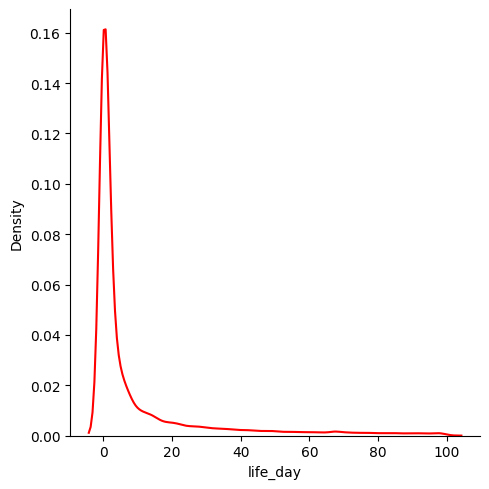

In [12]:
sns.displot(data = iss_mid,kind="kde", x="life_day", color = 'red')

In [13]:
iss_low=iss[(iss["life_day"] < 14)]
len(iss_low)

348679

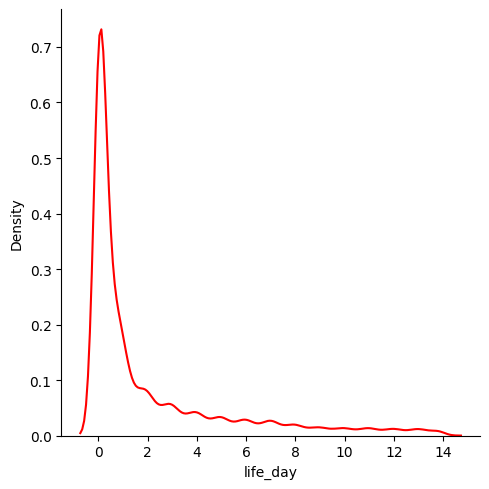

In [14]:
sns.displot(data = iss_low,kind="kde", x="life_day", color = 'red')

In [15]:
iss_vlow=iss[(iss["life_day"] < 3)]
len(iss_vlow)

270177

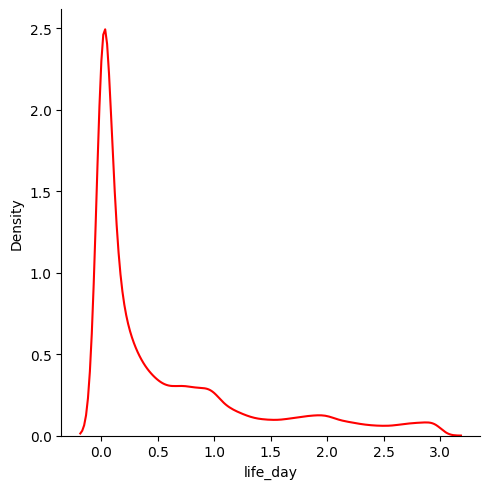

In [16]:
sns.displot(data = iss_vlow,kind="kde", x="life_day", color = 'red')

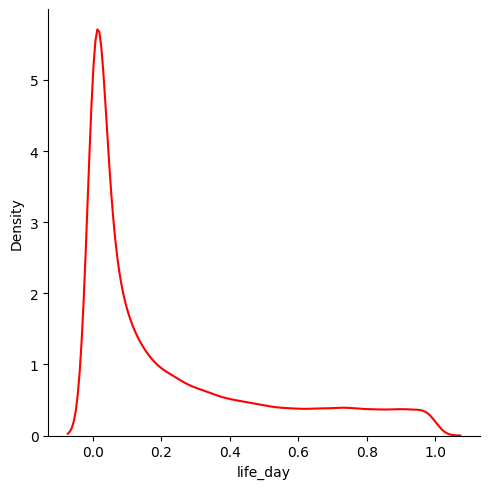

In [17]:
iss_xlow=iss[(iss["life_day"] < 1)]
sns.displot(data = iss_xlow,kind="kde", x="life_day", color = 'red')

In [18]:
iss_xlow

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,...,life_time_sec,first_event_time_sec,first_comment_time_sec,commit_count,comment_count,end,bot_ratio,has_bot,life_day,idle_time
132842,Issue,"""https://github.com/fastai/fastbook/issues/443""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.000000,False,0.000000,0.000000
132843,Issue,"""https://github.com/fastai/fastbook/issues/442""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.000000,False,0.000000,0.000000
132844,Issue,"""https://github.com/fastai/fastbook/issues/441""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.000000,False,0.000000,0.000000
177245,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,2,0,0,0,2,...,0,-1,-1,0,0,Green,0.000000,False,0.000000,0.000000
177407,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.000000,False,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390082,Issue,"""https://github.com/go-gitea/gitea/issues/26940""",User,User,True,4,1,1,0,2,...,86395,-1,85583,0,10,Green,0.250000,True,0.999942,0.990601
133228,Issue,"""https://github.com/fastai/fastbook/pull/16""",Contributer,Member,False,3,1,1,1,0,...,86396,-1,7,1,3,Red,0.333333,True,0.999954,0.000093
587403,Issue,"""https://github.com/TheAlgorithms/Python/pull/...",User,Member,False,2,0,1,0,1,...,86396,-1,86396,1,1,Red,0.000000,False,0.999954,1.000000
429977,Issue,"""https://github.com/beego/beego/pull/4235""",User,User,True,1,0,0,0,1,...,86398,-1,-1,1,0,Green,0.000000,False,0.999977,0.000000


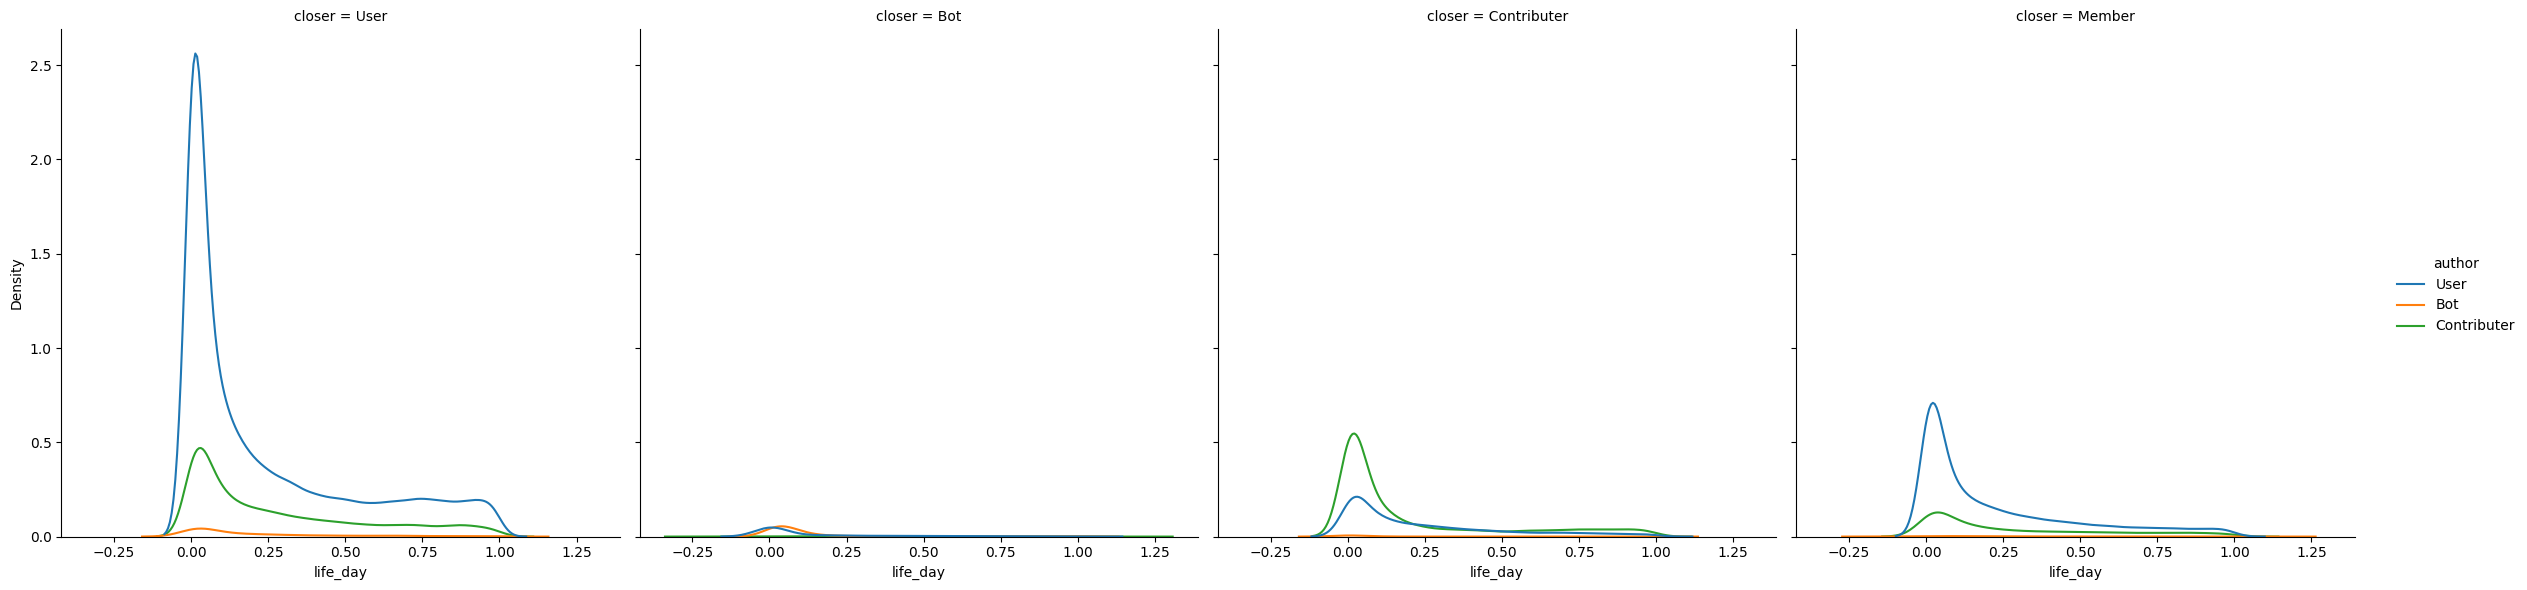

In [19]:
sns.displot(data=iss_xlow,x="life_day", kind="kde",hue="author",col="closer",height=6)

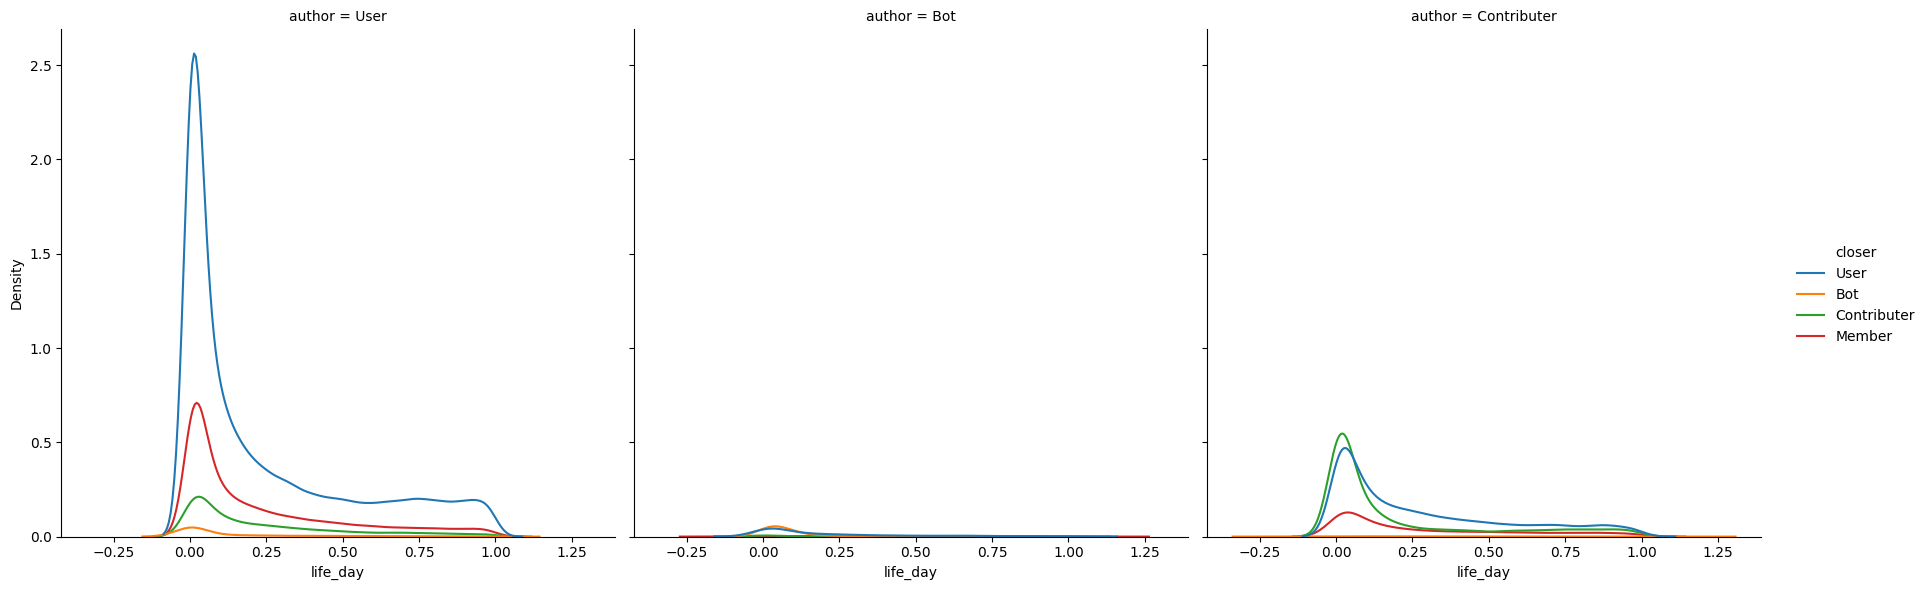

In [20]:
sns.displot(data=iss_xlow,x="life_day", kind="kde",hue="closer",col="author",height=6)

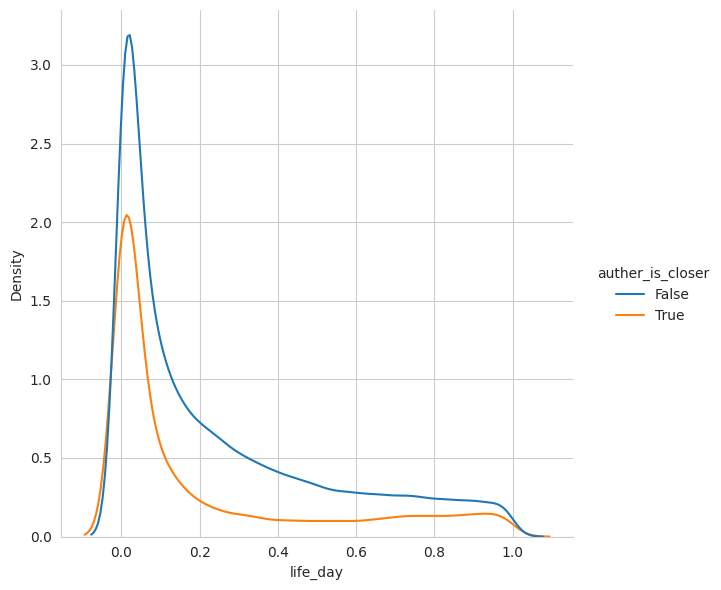

In [21]:
sns.set_style("whitegrid")
sns.displot(data=iss_xlow, x="life_day", kind="kde",hue="auther_is_closer", height=6)

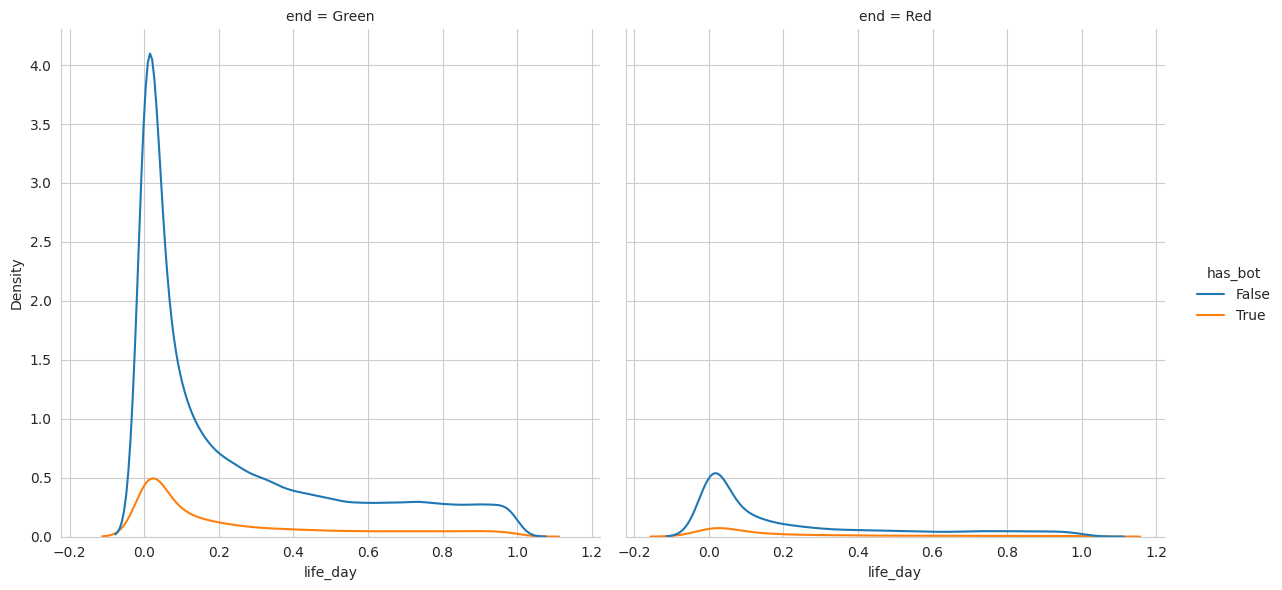

In [22]:
sns.displot(data=iss_xlow, x="life_day", kind="kde",hue="has_bot", height=6,col="end")

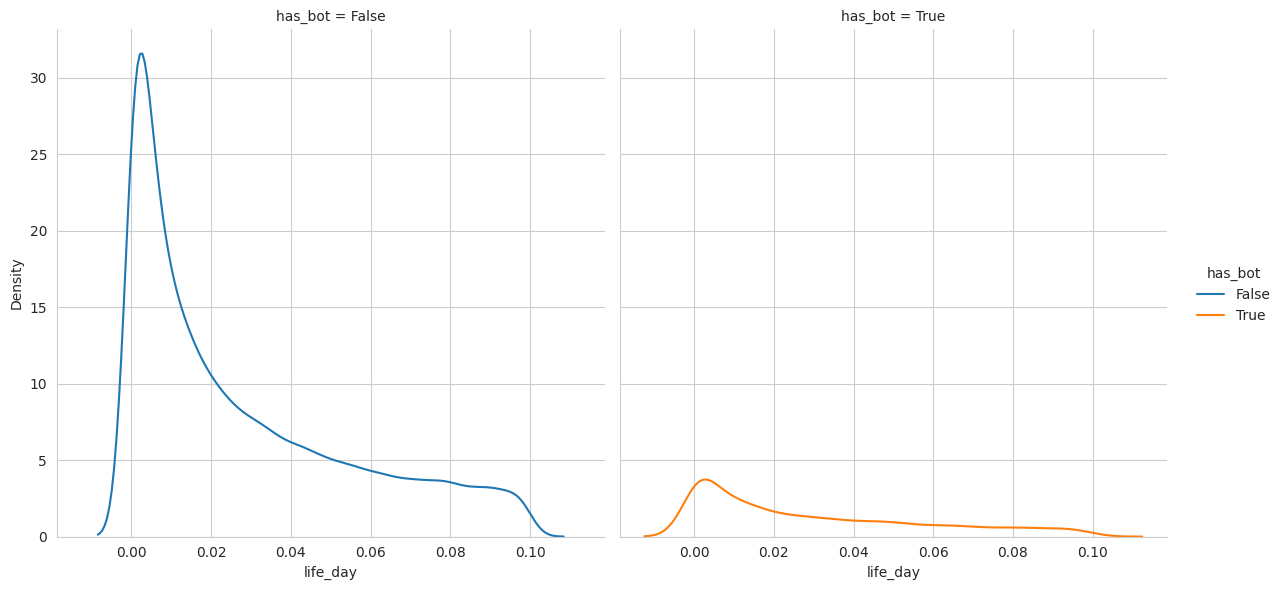

In [23]:
iss_xxlow=iss[(iss["life_day"] < 0.1)]
sns.displot(data=iss_xxlow, x="life_day", kind="kde",hue="has_bot", height=6,col="has_bot")

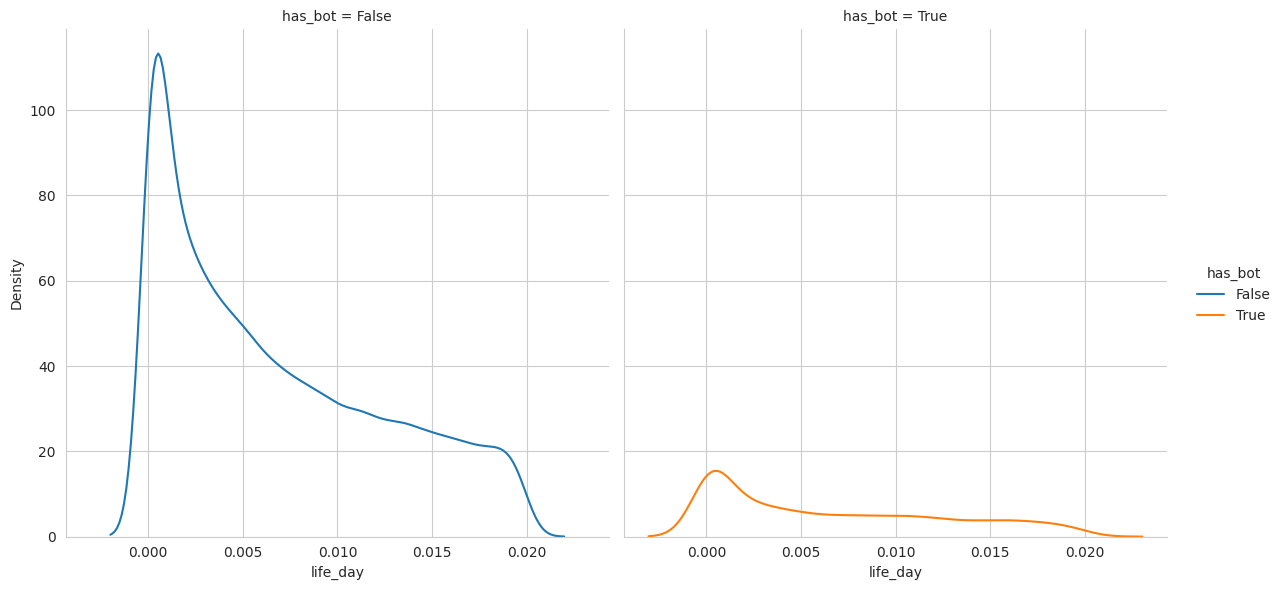

In [24]:
iss_xxlow=iss[(iss["life_day"] < 0.02)]
sns.displot(data=iss_xxlow, x="life_day", kind="kde",hue="has_bot", height=6,col="has_bot")

In [25]:
iss_xxlow

,rc_ty,url,author,closer,auther_is_closer,participants_total,participants_bot,participants_member,participants_contributer,participants_user,...,life_time_sec,first_event_time_sec,first_comment_time_sec,commit_count,comment_count,end,bot_ratio,has_bot,life_day,idle_time
132842,Issue,"""https://github.com/fastai/fastbook/issues/443""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
132843,Issue,"""https://github.com/fastai/fastbook/issues/442""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
132844,Issue,"""https://github.com/fastai/fastbook/issues/441""",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
177245,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,2,0,0,0,2,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
177407,Issue,"""https://github.com/microsoft/TypeScript/issue...",User,User,True,1,0,0,0,1,...,0,-1,-1,0,0,Green,0.0,False,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527263,Issue,"""https://github.com/wagtail/wagtail/issues/6103""",Contributer,User,False,2,0,0,1,1,...,1727,-1,1727,0,2,Green,0.0,False,0.019988,1.000000
601005,Issue,"""https://github.com/appwrite/appwrite/pull/156""",User,Member,False,2,0,1,0,1,...,1727,-1,1727,1,1,Red,0.0,False,0.019988,1.000000
603721,Issue,"""https://github.com/huggingface/pytorch-image-...",User,User,False,2,0,0,0,2,...,1727,-1,1727,0,2,Green,0.0,False,0.019988,1.000000
613636,Issue,"""https://github.com/shadcn-ui/ui/issues/2794""",User,User,True,1,0,0,0,1,...,1727,-1,1727,0,1,Green,0.0,False,0.019988,1.000000


In [26]:
len(prs)

219549

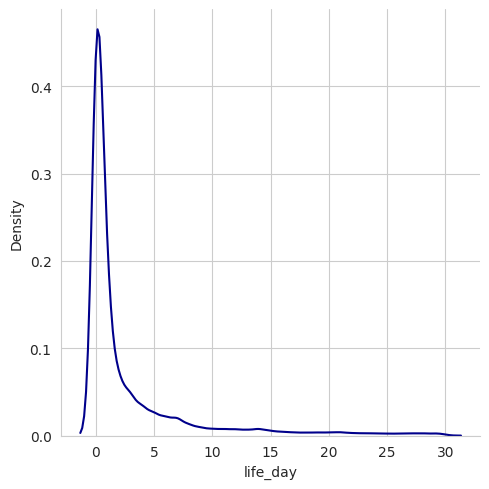

In [27]:
prs_mid = prs[(prs["life_day"]<30)]
sns.displot(data = prs_mid,kind="kde", x="life_day", color = 'darkblue')

In [28]:
prs_low = prs[(prs["life_day"]<7)]

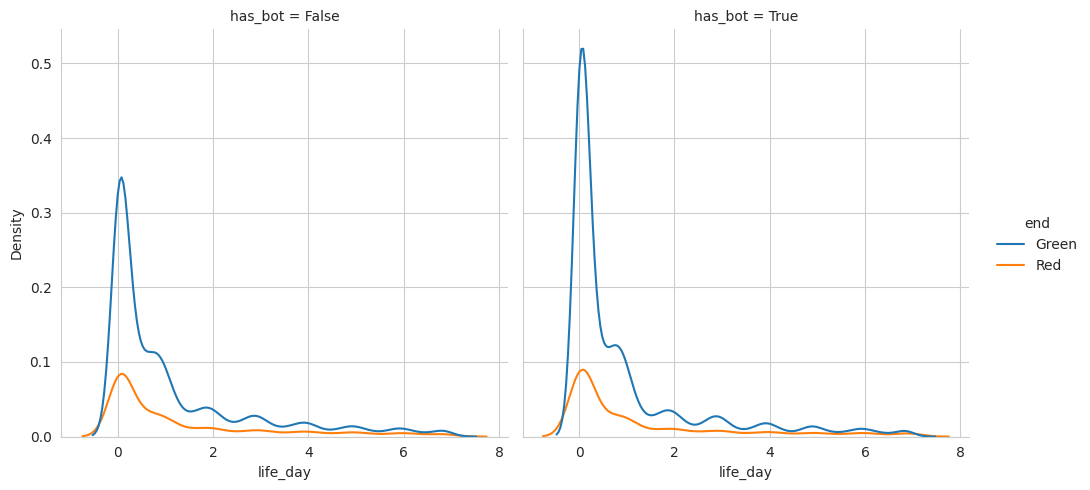

In [29]:
prs_low = prs[(prs["life_day"]<7)]
sns.displot(data = prs_low,kind="kde", x="life_day", color = 'darkblue',hue="end",col="has_bot")

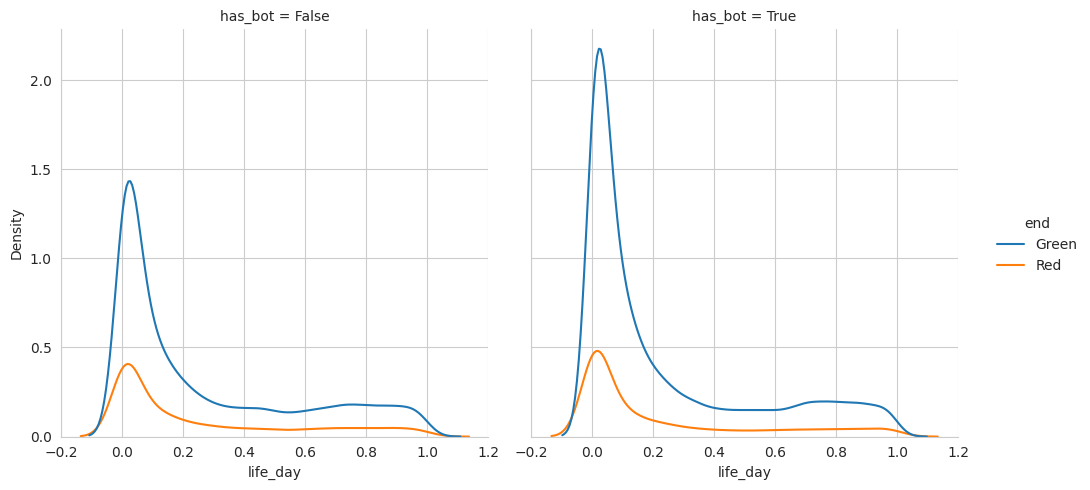

In [30]:
prs_xlow = prs[(prs["life_day"]<1)]
sns.displot(data = prs_xlow,kind="kde", x="life_day", color = 'darkblue',hue="end",col="has_bot")

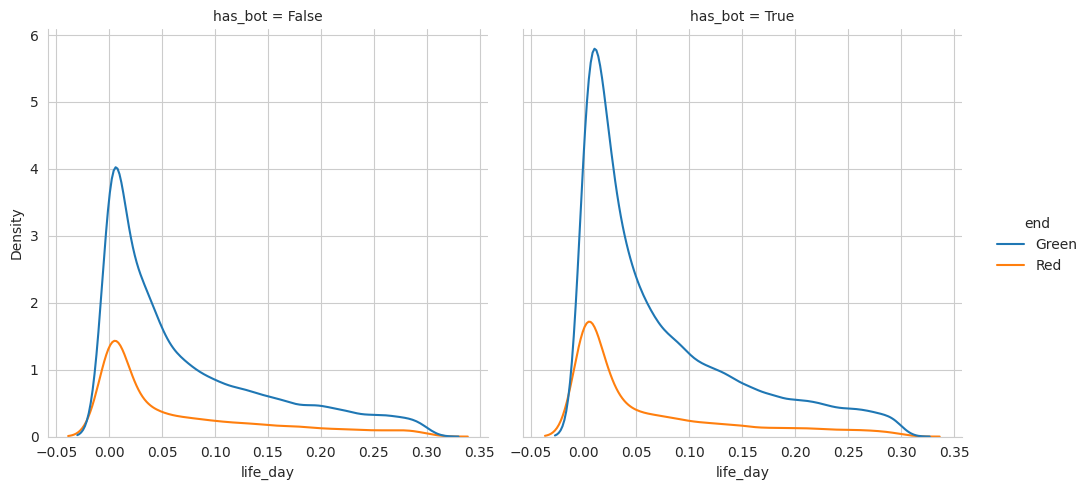

In [31]:
prs_xxlow = prs[(prs["life_day"]<0.3)]
sns.displot(data = prs_xxlow,kind="kde", x="life_day", color = 'darkblue',hue="end",col="has_bot")

(<seaborn.axisgrid.FacetGrid at 0x7b6e3671a660>,)

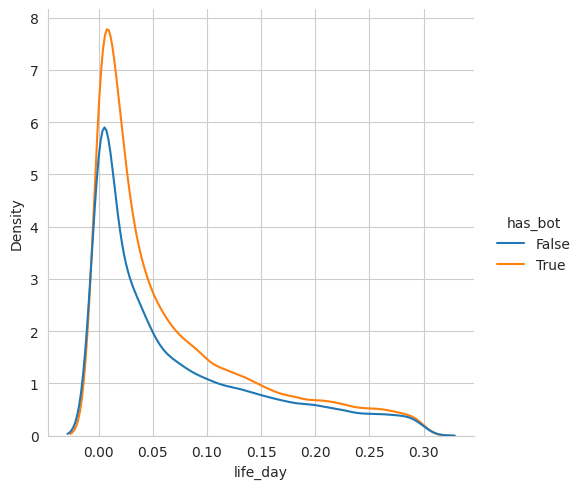

In [37]:
prs_xxlow = prs[(prs["life_day"]<0.3)]
sns.displot(data = prs_xxlow,kind="kde", x="life_day", color = 'darkblue',hue="has_bot"),

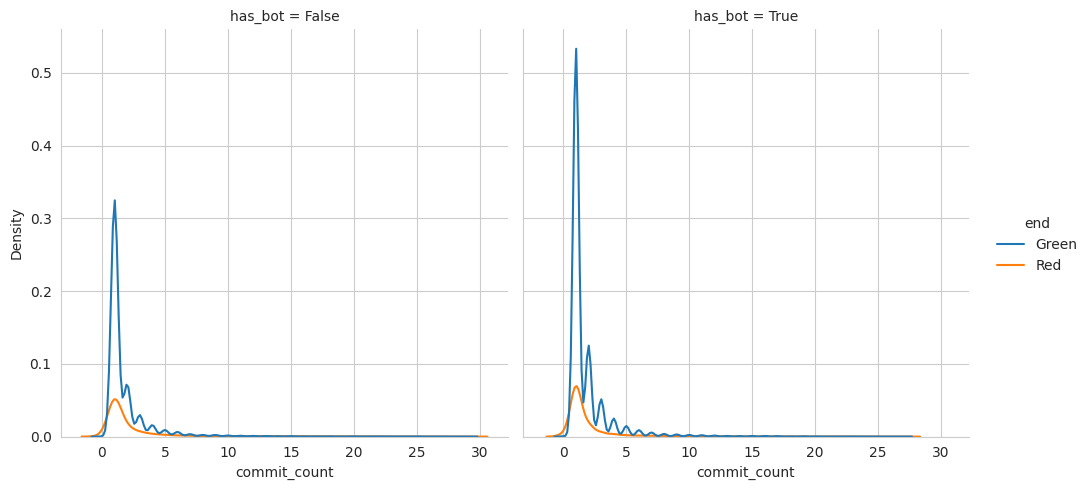

In [32]:
prs_xxlow = prs[(prs["life_day"]<0.3)]
sns.displot(data = prs_xxlow,kind="kde", x="commit_count", color = 'darkblue',hue="end",col="has_bot")

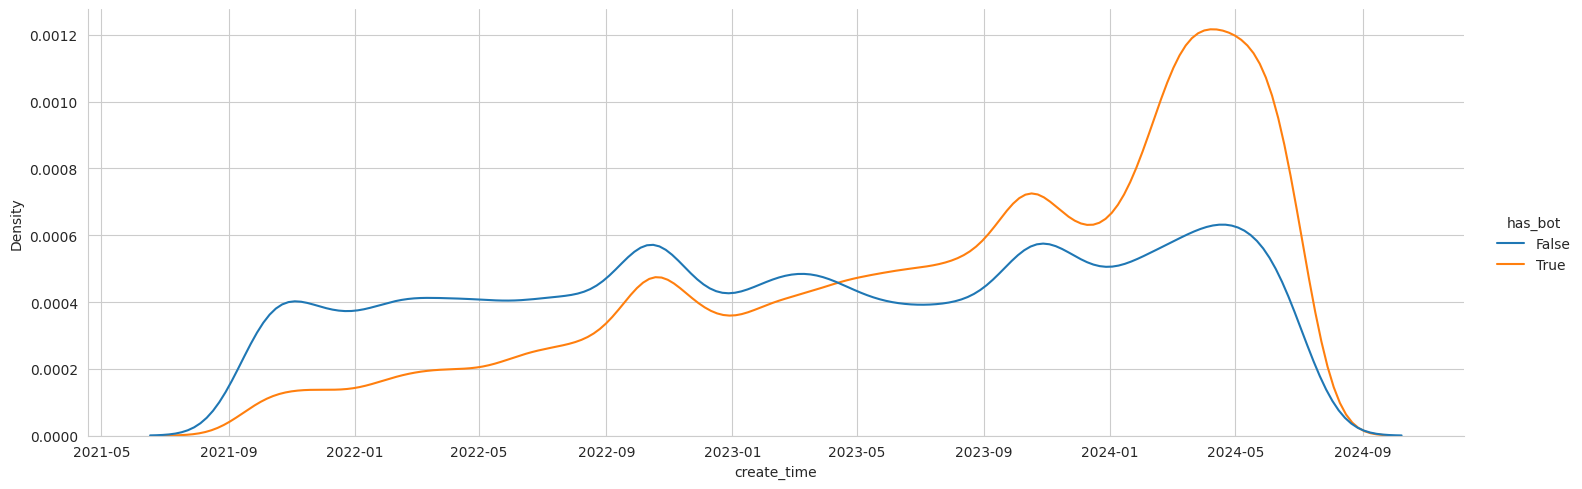

In [36]:
sns.displot(data = prs, kind="kde", x="create_time",hue="has_bot", color = 'darkblue',aspect=3)

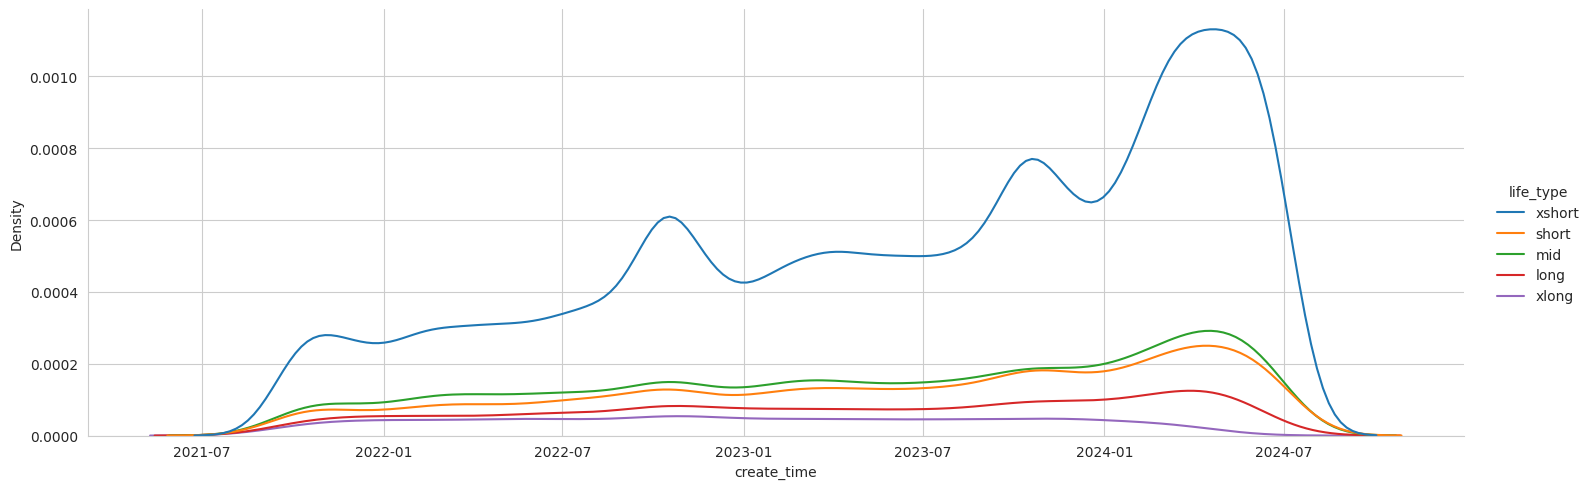

In [68]:
sns.displot(data = prs, kind="kde", x="create_time",hue="life_type", color = 'darkblue',aspect=3)

In [ ]:
sns.displot(data = prs, kind="kde", x="create_time",hue="has_bot", color = 'darkblue',aspect=3)

<Axes: xlabel='create_time', ylabel='bot_ratio'>

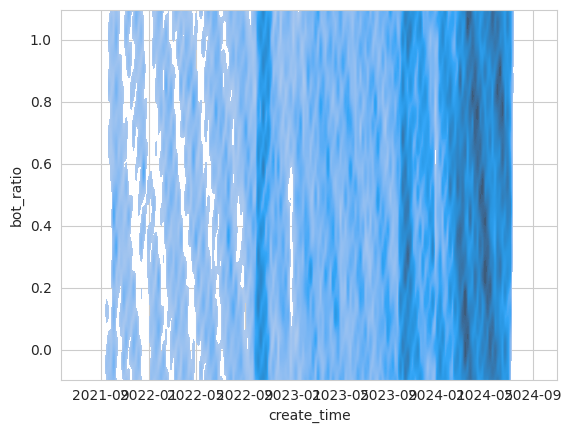

In [46]:
sns.kdeplot(data = prs,x="create_time",y="life_time",fill=True,levels=128)

<Axes: xlabel='create_time', ylabel='bot_ratio'>

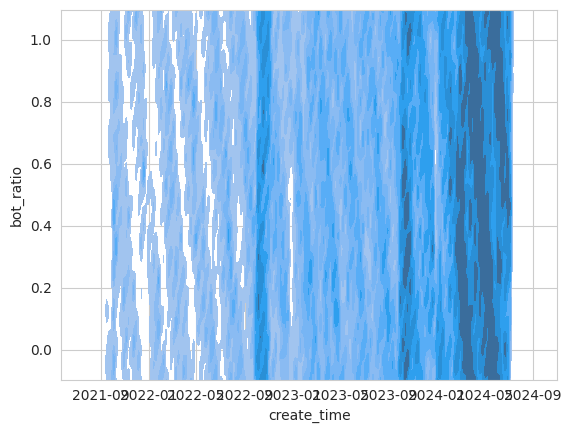

In [47]:
sns.kdeplot(data = prs,x="create_time",y="bot_ratio",fill=True,levels=8)